In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

importing raw data

In [ ]:
# Using CSV files with 82k rows
txn_file_id = "1VCL5euRlrbilNOUbP3jRIqHledbC73uQ"
txn_url = f"https://drive.google.com/uc?id={txn_file_id}"
txn_file = gdown.download(txn_url, quiet=False)
txn_df = pd.read_csv(txn_file)
txn_df.head()

Downloading...
From: https://drive.google.com/uc?id=1VCL5euRlrbilNOUbP3jRIqHledbC73uQ
To: /content/nodes_filtered_82k.csv
100%|██████████| 11.3M/11.3M [00:00<00:00, 34.6MB/s]


,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,56a96d9841d22764287c9a37cedf97c47678690c2507e0...,5,2,188.74,188.74,377.48,37.748000,94.37,0,0,0,0,0
1,93d9e131c856061a11adc1054eaaf7502d147eb9e754fd...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,0,0,0
2,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,104,1,5199.00,5199.00,10398.00,49.990385,5199.00,1,0,0,0,1
3,31d0381a230ef3c092fac8dd415cb0e02cf4f4546b03de...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,0,0,0
4,ca485d7d88cd8f82730c1530f272edf95e140d66b29f0c...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once the file is saved, you can get a shareable link from Google Drive:

1.  **Go to Google Drive:** Open your Google Drive in a web browser.
2.  **Navigate to the file:** Find the `full_df.csv` file in the specified path (e.g., `My Drive/full_df.csv`).
3.  **Right-click the file:** Select 'Share' and then 'Share' again.
4.  **Change general access:** In the sharing dialog, change 'General access' from 'Restricted' to 'Anyone with the link'.
5.  **Copy the link:** Click 'Copy link' and then 'Done'.

This link can then be shared with your teammates.

In [ ]:
edges_file_id = "1Pd0-jCes1B2Adb-2OvrKfg7FirQDl1eR"
edges_url = f"https://drive.google.com/uc?id={edges_file_id}"
edges_file = gdown.download(edges_url, quiet=False)
edges_df = pd.read_csv(edges_file)
edges_df.head()

Downloading...
From: https://drive.google.com/uc?id=1Pd0-jCes1B2Adb-2OvrKfg7FirQDl1eR
To: /content/txn_filtered_82k.csv
100%|██████████| 57.7M/57.7M [00:00<00:00, 62.0MB/s]


,tx_hash_from,tx_hash_to,datetime,amount_bitcoins
0,93d9e131c856061a11adc1054eaaf7502d147eb9e754fd...,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,2010-02-04 23:48:17,50.0
1,31d0381a230ef3c092fac8dd415cb0e02cf4f4546b03de...,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,2010-02-05 01:20:38,50.0
2,ca485d7d88cd8f82730c1530f272edf95e140d66b29f0c...,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,2010-02-05 02:20:33,50.0
3,c5f6a336339e8740ce46e89e6b2e87fba8ce5184686980...,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,2010-02-05 07:07:33,50.0
4,ab9695d44bb2ddc0b6d68dc68b9ea2ba6e4006b3ce3a1a...,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,2010-02-05 14:12:01,50.0


Exploratory Data Analysis of the original dataset

tx_hash


,tx_hash
count,82015
unique,82015
top,065e1a4fcfd3444fe3c861b8bcc23231f08344565455e5...
freq,1




indegree


,indegree
count,82015.000000
mean,16.505603
std,49.953865
min,0.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,1932.000000


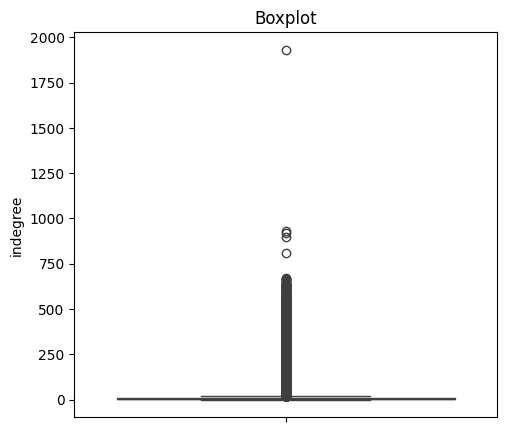

outdegree


,outdegree
count,82015.000000
mean,13.443943
std,42.602558
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,927.000000


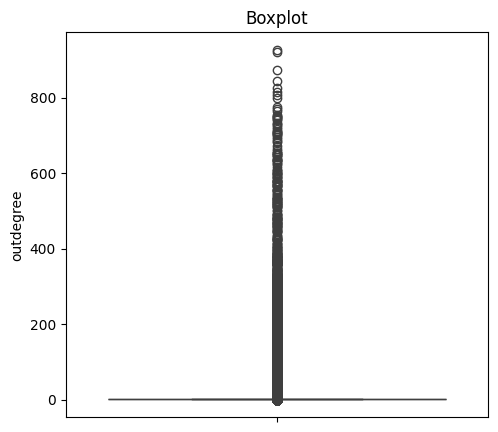

in_btc


,in_btc
count,82015.000000
mean,58.350555
std,700.169250
min,0.000000
25%,0.273821
50%,3.003868
75%,24.000000
max,96722.132599


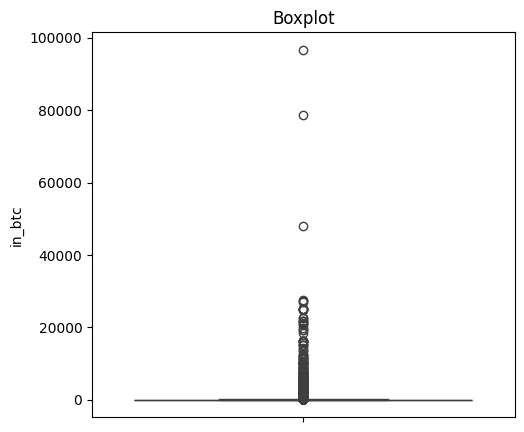

out_btc


,out_btc
count,82015.000000
mean,58.348082
std,722.032807
min,0.000000
25%,0.370178
50%,3.899800
75%,27.277399
max,96722.000000


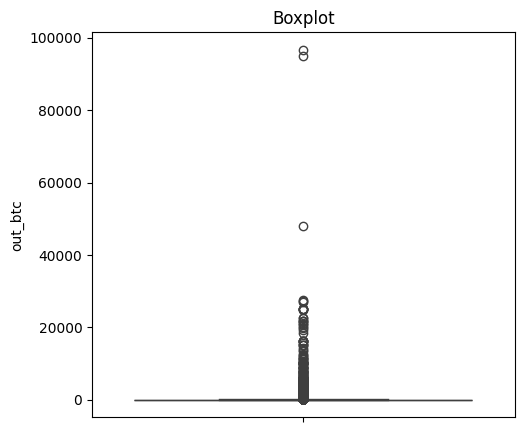

total_btc


,total_btc
count,8.201500e+04
mean,1.166986e+02
std,1.419840e+03
min,2.000000e-07
25%,8.938243e-01
50%,8.030000e+00
75%,5.000000e+01
max,1.934441e+05


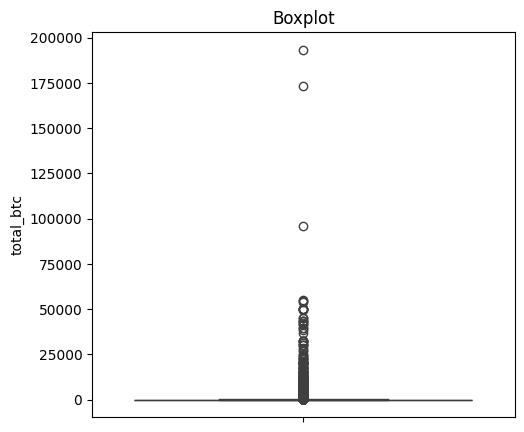

mean_in_btc


,mean_in_btc
count,82015.000000
mean,33.135350
std,460.802890
min,0.000000
25%,0.076924
50%,0.811750
75%,9.290000
max,47996.170000


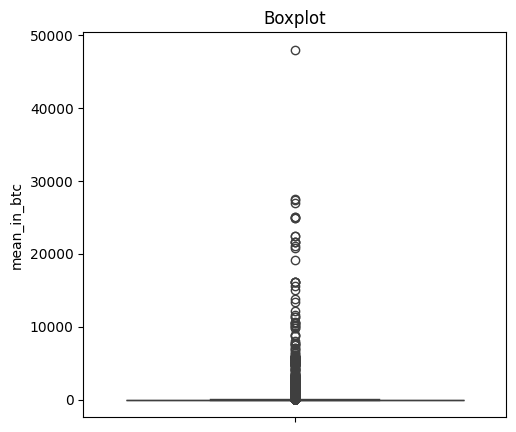

mean_out_btc


,mean_out_btc
count,82015.000000
mean,29.923104
std,553.740106
min,0.000000
25%,0.140000
50%,1.104750
75%,8.620125
max,96722.000000


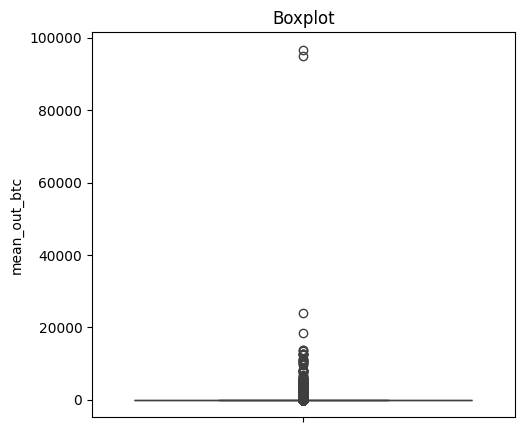

in_malicious


,in_malicious
count,82015.000000
mean,0.013815
std,0.116721
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


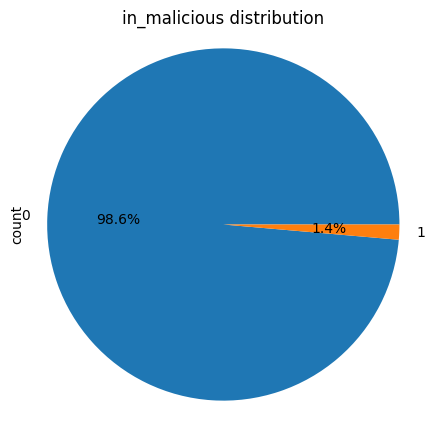

,count
in_malicious,
0,80882
1,1133


out_malicious


,out_malicious
count,82015.000000
mean,0.000719
std,0.026812
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


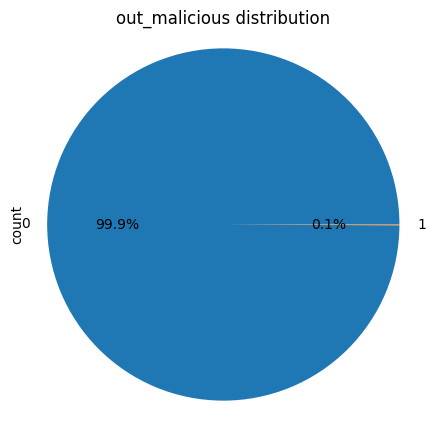

,count
out_malicious,
0,81956
1,59


is_malicious


,is_malicious
count,82015.000000
mean,0.000573
std,0.023932
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


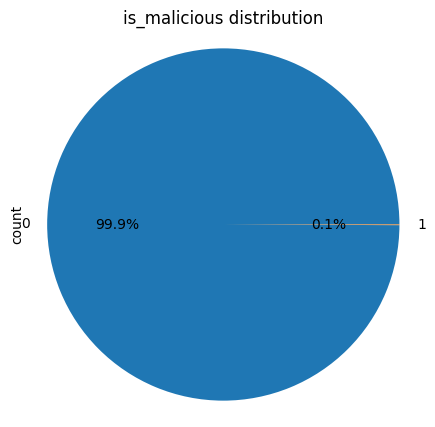

,count
is_malicious,
0,81968
1,47


out_and_tx_malicious


,out_and_tx_malicious
count,82015.000000
mean,0.001244
std,0.035244
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


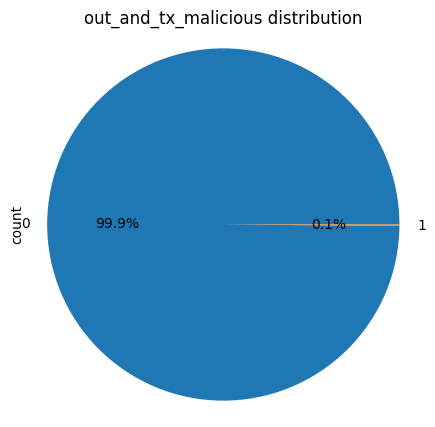

,count
out_and_tx_malicious,
0,81913
1,102


all_malicious


,all_malicious
count,82015.000000
mean,0.015009
std,0.121591
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


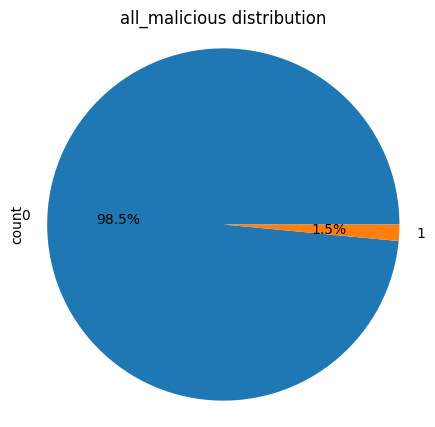

,count
all_malicious,
0,80784
1,1231


In [ ]:
for col in txn_df.columns:
    print(col)
    display(txn_df[col].describe())
    print("\n")
    if col != "tx_hash":
      if col in ['in_malicious','out_malicious','is_malicious','out_and_tx_malicious','all_malicious']:
        label_counts = txn_df[col].value_counts()
        label_counts.plot(
          kind='pie',
          autopct='%1.1f%%',
          figsize=(5, 5),
          title = f"{col} distribution"

        )
        plt.axis('equal')
        plt.show()
        display(label_counts)
      else:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(txn_df[col])
        plt.title('Boxplot')
        plt.show()


From the report table of the original dataset, one could oberseve the presences of extreme values in many columns as well as most of these values are heavily right-skewed. This emphasises the importance of a Log transform for columns including 'indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc','mean_in_btc','mean_out_btc',

behavioral featuers

In [ ]:
txn_df_copy = txn_df.copy()
#create a copy of dataframe for safety

In [ ]:
def add_behavioral_features(df):
    df = df.copy()

    # 1) Basic degree stats
    df['degree_sum'] = df['indegree'] + df['outdegree']
    df['degree_diff'] = abs(df['indegree'] - df['outdegree'])

    # Avoid division-by-zero using np.where
    df['in_out_degree_ratio'] = np.where(
        df['outdegree'] > 0,
        df['indegree'] / df['outdegree'],
        0.0
    )

    # 2) Value ratios (BTC inflow vs outflow)
    df['in_out_btc_ratio'] = np.where(
        df['out_btc'] > 0,
        df['in_btc'] / df['out_btc'],
        0.0
    )

    # 3) Value per edge (how much value flows per connection)
    df['value_per_in_edge'] = np.where(
        df['indegree'] > 0,
        df['in_btc'] / df['indegree'],
        0.0
    )

    df['value_per_out_edge'] = np.where(
        df['outdegree'] > 0,
        df['out_btc'] / df['outdegree'],
        0.0
    )

    df['value_per_all_edges'] = np.where(
        df['degree_sum'] > 0,
        df['total_btc'] / df['degree_sum'],
        0.0
    )

    # 4) High-degree / high-value flags (extreme behaviour)
    indegree_thr = df['indegree'].quantile(0.99)
    outdegree_thr = df['outdegree'].quantile(0.99)
    total_btc_thr = df['total_btc'].quantile(0.99)

    df['is_high_indegree'] = (df['indegree'] >= indegree_thr).astype(int)
    df['is_high_outdegree'] = (df['outdegree'] >= outdegree_thr).astype(int)
    df['is_high_total_btc'] = (df['total_btc'] >= total_btc_thr).astype(int)

    return df


In [ ]:
txn_df_copy = add_behavioral_features(txn_df_copy)
print(txn_df_copy.columns)
for col in txn_df_copy.columns:
  if col not in txn_df.columns:
    display(txn_df_copy[col].describe())


Index(['tx_hash', 'indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc',
       'mean_in_btc', 'mean_out_btc', 'in_malicious', 'out_malicious',
       'is_malicious', 'out_and_tx_malicious', 'all_malicious', 'degree_sum',
       'degree_diff', 'in_out_degree_ratio', 'in_out_btc_ratio',
       'value_per_in_edge', 'value_per_out_edge', 'value_per_all_edges',
       'is_high_indegree', 'is_high_outdegree', 'is_high_total_btc'],
      dtype='object')


,degree_sum
count,82015.000000
mean,29.949546
std,62.983592
min,1.000000
25%,3.000000
50%,6.000000
75%,29.000000
max,1934.000000


,degree_diff
count,82015.000000
mean,27.105066
std,62.677592
min,0.000000
25%,1.000000
50%,2.000000
75%,26.000000
max,1930.000000


,in_out_degree_ratio
count,82015.000000
mean,11.312923
std,39.533327
min,0.000000
25%,0.500000
50%,1.000000
75%,5.000000
max,966.000000


,in_out_btc_ratio
count,8.201500e+04
mean,9.676560e+01
std,9.488356e+03
min,0.000000e+00
25%,1.000000e+00
50%,1.000131e+00
75%,1.005587e+00
max,2.098428e+06


,value_per_in_edge
count,82015.000000
mean,33.135350
std,460.802890
min,0.000000
25%,0.076924
50%,0.811750
75%,9.290000
max,47996.170000


,value_per_out_edge
count,82015.000000
mean,29.923104
std,553.740106
min,0.000000
25%,0.140000
50%,1.104750
75%,8.620125
max,96722.000000


,value_per_all_edges
count,8.201500e+04
mean,2.218058e+01
std,3.096166e+02
min,1.000000e-07
25%,9.573778e-02
50%,8.018841e-01
75%,4.707170e+00
max,3.199745e+04


,is_high_indegree
count,82015.000000
mean,0.010047
std,0.099730
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,is_high_outdegree
count,82015.000000
mean,0.010120
std,0.100089
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,is_high_total_btc
count,82015.00000
mean,0.01001
std,0.09955
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


As one could possibly forsee, the newly added columns are also extremely right skewed.

graph related feature enineering

In [ ]:
# build node-level dataframe
edges_df['datetime'] = pd.to_datetime(edges_df['datetime'])
edges_df['amount_bitcoins'] = edges_df['amount_bitcoins'].astype(float)

# Ensure tx_hash columns are strings
edges_df['tx_hash_from'] = edges_df['tx_hash_from'].astype(str)
edges_df['tx_hash_to'] = edges_df['tx_hash_to'].astype(str)

def build_node_df(edges_df: pd.DataFrame) -> pd.DataFrame:
    # All unique addresses
    all_addrs = pd.Index(
        pd.unique(edges_df[['tx_hash_from', 'tx_hash_to']].values.ravel('K'))
    )
    node_df = pd.DataFrame({'tx_hash': all_addrs})
    node_df = node_df.reset_index(drop=True)  # index will be 0..N-1

    # Outgoing stats
    out_stats = (
        edges_df
        .groupby('tx_hash_from')
        .agg(
            outdegree=('tx_hash_to', 'count'),
            out_btc=('amount_bitcoins', 'sum')
        )
        .reset_index()
        .rename(columns={'tx_hash_from': 'tx_hash'})
    )

    # Incoming stats
    in_stats = (
        edges_df
        .groupby('tx_hash_to')
        .agg(
            indegree=('tx_hash_from', 'count'),
            in_btc=('amount_bitcoins', 'sum')
        )
        .reset_index()
        .rename(columns={'tx_hash_to': 'tx_hash'})
    )

    # Merge
    node_df = (
        node_df
        .merge(out_stats, on='tx_hash', how='left')
        .merge(in_stats, on='tx_hash', how='left')
    )

    # Fill NA
    for col in ['indegree', 'outdegree']:
        node_df[col] = node_df[col].fillna(0).astype(int)

    for col in ['in_btc', 'out_btc']:
        node_df[col] = node_df[col].fillna(0.0).astype(float)

    node_df['total_btc'] = node_df['in_btc'] + node_df['out_btc']

    # Optional simple temporal features
    tmp_from = edges_df[['tx_hash_from', 'datetime']].rename(
        columns={'tx_hash_from': 'tx_hash'}
    )
    tmp_to = edges_df[['tx_hash_to', 'datetime']].rename(
        columns={'tx_hash_to': 'tx_hash'}
    )
    tmp_all = pd.concat([tmp_from, tmp_to], ignore_index=True)

    time_stats = (
        tmp_all
        .groupby('tx_hash')['datetime']
        .agg(first_seen='min', last_seen='max', tx_count='count')
        .reset_index()
    )

    node_df = node_df.merge(time_stats, on='tx_hash', how='left')
    node_df['activity_span_seconds'] = (
        node_df['last_seen'] - node_df['first_seen']
    ).dt.total_seconds().fillna(0)
    node_df['activity_span_days'] = node_df['activity_span_seconds'] / 86400.0

    return node_df

node_df = build_node_df(edges_df)


In [ ]:
!pip install python-igraph
import igraph as ig
def build_dag(node_df: pd.DataFrame, edges_df: pd.DataFrame) -> ig.Graph:
    g = ig.Graph(directed=True)

    # one vertex per row in node_df
    n = len(node_df)
    g.add_vertices(n)

    # map tx_hash -> vertex index (same order as node_df)
    tx_list = node_df['tx_hash'].tolist()
    g.vs['tx_hash'] = tx_list
    idx_map = {h: i for i, h in enumerate(tx_list)}

    # build edge list using mapping
    edge_list = []
    for frm, to in zip(edges_df['tx_hash_from'], edges_df['tx_hash_to']):
        if frm in idx_map and to in idx_map:
            edge_list.append((idx_map[frm], idx_map[to]))

    g.add_edges(edge_list)

    return g

dag = build_dag(node_df, edges_df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 22.5 MB/s eta 0:00:00


In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(zip(edges_df['tx_hash_from'], edges_df['tx_hash_to']))


In [ ]:
def add_graph_features(
    df: pd.DataFrame,
    edges_df: pd.DataFrame,
    G: nx.DiGraph,
    epsilon: float = 1e-8,
    compute_closeness: bool = False,
    compute_katz: bool = False,
    max_k_for_betweenness: int = 20,
    max_clustering_nodes: int = 10000,
):
    """
    Add graph-based features to node-level df using NetworkX graph G.

    Speed-optimised & with progress printing.

    Parameters
    ----------
    df : DataFrame
        Node-level data with at least:
        'tx_hash', 'indegree', 'outdegree', 'in_btc', 'out_btc'
    edges_df : DataFrame
        Edge list with columns: 'tx_hash_from', 'tx_hash_to'
    G : nx.DiGraph
        Directed graph, nodes are tx_hash strings.
    epsilon : float
        Small constant to avoid division by zero.
    compute_closeness : bool
        If True, compute closeness centrality (expensive on large graphs).
    compute_katz : bool
        If True, compute Katz centrality (expensive on large graphs).
    max_k_for_betweenness : int
        Sample size k for approximate betweenness centrality.
    max_clustering_nodes : int
        Max number of nodes for which to compute local clustering.
        If graph is larger, we compute clustering only for top nodes.
    """

    df = df.copy()

    num_nodes = len(G)
    num_edges = G.number_of_edges()
    print(f"[add_graph_features] Start: {num_nodes} nodes, {num_edges} edges")

    # ======================================================
    # 1) Counterparty HHI in / out
    # ======================================================
    print("[add_graph_features] Step 1: Computing HHI_in / HHI_out ...")
    cols = ['tx_hash_from', 'tx_hash_to']
    edges_small = edges_df[cols].copy()

    for c in cols:
        edges_small[c] = edges_small[c].astype(str)

    # Outgoing HHI
    out_pair_counts = (
        edges_small[['tx_hash_from', 'tx_hash_to']]
        .value_counts(sort=False)
        .rename('cnt')
        .reset_index()
    )

    out_agg = (
        out_pair_counts
        .groupby('tx_hash_from', observed=True)['cnt']
        .agg(total='sum', sumsq=lambda s: (s * s).sum())
        .reset_index()
    )

    cp_hhi_out = out_agg.assign(
        cp_hhi_out=(out_agg['sumsq'] / (out_agg['total'] ** 2)) * 10000
    )[['tx_hash_from', 'cp_hhi_out']].rename(columns={'tx_hash_from': 'tx_hash'})

    # Incoming HHI
    in_pair_counts = (
        edges_small[['tx_hash_to', 'tx_hash_from']]
        .value_counts(sort=False)
        .rename('cnt')
        .reset_index()
    )

    in_agg = (
        in_pair_counts
        .groupby('tx_hash_to', observed=True)['cnt']
        .agg(total='sum', sumsq=lambda s: (s * s).sum())
        .reset_index()
    )

    cp_hhi_in = in_agg.assign(
        cp_hhi_in=(in_agg['sumsq'] / (in_agg['total'] ** 2)) * 10000
    )[['tx_hash_to', 'cp_hhi_in']].rename(columns={'tx_hash_to': 'tx_hash'})

    # Merge HHI into df
    df = df.merge(cp_hhi_out, on='tx_hash', how='left')
    df = df.merge(cp_hhi_in, on='tx_hash', how='left')
    df['cp_hhi_out'] = df['cp_hhi_out'].fillna(0.0)
    df['cp_hhi_in'] = df['cp_hhi_in'].fillna(0.0)

    print("[add_graph_features] Step 1 done.")

    # ======================================================
    # 2) Peel length / peel ratio
    # ======================================================
    print("[add_graph_features] Step 2: Computing peel_len / peel_ratio ...")
    df['peel_len'] = 0
    df['peel_ratio'] = 0.0

    # Map tx_hash -> row index for df
    tx_to_idx = {tx: i for i, tx in df['tx_hash'].items()}

    # Only loop over nodes with outdegree == 1
    peel_candidates = df.loc[df['outdegree'] == 1, 'tx_hash'].tolist()

    for tx in peel_candidates:
        if tx not in G:
            continue

        row_idx = tx_to_idx[tx]
        current = tx
        peel_count = 0

        while True:
            succ = list(G.successors(current))
            if len(succ) == 1:
                peel_count += 1
                nxt = succ[0]
                # stop if next node no longer has outdegree 1 in graph
                if G.out_degree(nxt) != 1:
                    break
                current = nxt
            else:
                break

        df.at[row_idx, 'peel_len'] = peel_count
        df.at[row_idx, 'peel_ratio'] = (
            df.at[row_idx, 'out_btc'] / (df.at[row_idx, 'in_btc'] + epsilon)
        )

    print("[add_graph_features] Step 2 done.")

    # ======================================================
    # 3) Centralities: PageRank, Betweenness, Closeness, Katz
    # ======================================================
    print("[add_graph_features] Step 3: Computing centralities ...")

    # 3.1 PageRank (kept, relatively reasonable)
    print("  - PageRank ...")
    if num_nodes > 0:
        pagerank = nx.pagerank(G, alpha=0.85)
    else:
        pagerank = {}
    df['pagerank'] = df['tx_hash'].map(pagerank).fillna(0.0)

    # 3.2 Betweenness (approximate, small k)
    print(f"  - Betweenness (approx, k={min(num_nodes, max_k_for_betweenness)}) ...")
    if num_nodes > 0:
        k = min(num_nodes, max_k_for_betweenness)
        betweenness_centrality = nx.betweenness_centrality(
            G,
            k=k,
            seed=42
        )
    else:
        betweenness_centrality = {}
    df['betweenness_centrality'] = df['tx_hash'].map(betweenness_centrality).fillna(0.0)

    # 3.3 Closeness (optional, expensive)
    if compute_closeness:
        print("  - Closeness centrality (this may be slow) ...")
        if num_nodes > 0:
            closeness_centrality = nx.closeness_centrality(G)
        else:
            closeness_centrality = {}
        df['closeness_centrality'] = df['tx_hash'].map(closeness_centrality).fillna(0.0)
    else:
        print("  - Skipping closeness centrality (set compute_closeness=True to enable).")
        df['closeness_centrality'] = 0.0

    # 3.4 Katz (optional, very expensive on big graphs)
    if compute_katz:
        print("  - Katz centrality (this may be slow) ...")
        katz_centrality = {node: 0.0 for node in G.nodes()}
        if num_nodes > 0:
            try:
                kc = nx.katz_centrality(G, max_iter=200, tol=1e-6)  # lower max_iter for speed
                katz_centrality.update(kc)
            except nx.PowerIterationFailedConvergence as e:
                print(f"    ! Warning: Katz centrality did not converge: {e}. Values left as 0.0.")
            except Exception as e:
                print(f"    ! Unexpected error in Katz centrality: {e}. Values left as 0.0.")
        df['katz_centrality'] = df['tx_hash'].map(katz_centrality).fillna(0.0)
    else:
        print("  - Skipping Katz centrality (set compute_katz=True to enable).")
        df['katz_centrality'] = 0.0

    print("[add_graph_features] Step 3 centralities done.")

    # ======================================================
    # 4) Local clustering (sampled for speed)
    # ======================================================
    print("[add_graph_features] Step 4: Computing local clustering (sampled) ...")
    if num_nodes == 0:
        df['local_clustering'] = 0.0
    else:
        G_und = G.to_undirected()
        if num_nodes <= max_clustering_nodes:
            # compute for all nodes
            print(f"  - Graph small enough, computing clustering for ALL {num_nodes} nodes.")
            local_clust = nx.clustering(G_und)
        else:
            # compute only for top-degree nodes
            print(f"  - Graph large; computing clustering for top {max_clustering_nodes} nodes by degree_sum.")
            if 'degree_sum' in df.columns:
                top_nodes = (
                    df.sort_values('degree_sum', ascending=False)
                      .head(max_clustering_nodes)['tx_hash']
                      .tolist()
                )
            else:
                # fallback: just sample some nodes
                top_nodes = list(df['tx_hash'].sample(n=max_clustering_nodes, random_state=42))

            local_clust_partial = nx.clustering(G_und, nodes=top_nodes)
            local_clust = {n: 0.0 for n in G.nodes()}
            local_clust.update(local_clust_partial)

        df['local_clustering'] = df['tx_hash'].map(local_clust).fillna(0.0)

    print("[add_graph_features] Step 4 done.")

    # ======================================================
    # 5) Reciprocity metrics (linear in graph size)
    # ======================================================
    print("[add_graph_features] Step 5: Computing reciprocity metrics ...")
    reciprocal_count = {}
    reciprocal_ratio = {}

    for n in G.nodes():
        out_n = set(G.successors(n))
        in_n = set(G.predecessors(n))

        both = out_n & in_n
        all_neighbors = out_n | in_n

        both_count = len(both)
        total_neighbors = len(all_neighbors)

        reciprocal_count[n] = both_count
        reciprocal_ratio[n] = (
            both_count / total_neighbors if total_neighbors > 0 else 0.0
        )

    df['reciprocal_neighbor_count'] = df['tx_hash'].map(reciprocal_count).fillna(0).astype(int)
    df['reciprocal_neighbor_ratio'] = df['tx_hash'].map(reciprocal_ratio).fillna(0.0)

    print("[add_graph_features] Step 5 done.")
    print("[add_graph_features] ALL DONE ✅")

    return df

In [ ]:
# G is your nx.DiGraph, node_df and edges_df already built
node_df_copy = node_df.copy()

node_df_copy = add_graph_features(
    node_df_copy,
    edges_df,
    G,
    compute_closeness=True,   # keep False unless you really need it
    compute_katz=True,        # keep False unless you really need it
    max_k_for_betweenness=20,  # smaller k = faster
    max_clustering_nodes=10000 # sample clustering when graph is huge
)


[add_graph_features] Start: 82015 nodes, 346309 edges
[add_graph_features] Step 1: Computing HHI_in / HHI_out ...
[add_graph_features] Step 1 done.
[add_graph_features] Step 2: Computing peel_len / peel_ratio ...
[add_graph_features] Step 2 done.
[add_graph_features] Step 3: Computing centralities ...
  - PageRank ...
  - Betweenness (approx, k=20) ...
  - Closeness centrality (this may be slow) ...
  - Katz centrality (this may be slow) ...
[add_graph_features] Step 3 centralities done.
[add_graph_features] Step 4: Computing local clustering (sampled) ...
  - Graph large; computing clustering for top 10000 nodes by degree_sum.
[add_graph_features] Step 4 done.
[add_graph_features] Step 5: Computing reciprocity metrics ...
[add_graph_features] Step 5 done.
[add_graph_features] ALL DONE ✅


In [ ]:
print(node_df_copy.columns)
for col in node_df_copy.columns:
  if col not in node_df.columns:
    display(node_df_copy[col].describe())


Index(['tx_hash', 'outdegree', 'out_btc', 'indegree', 'in_btc', 'total_btc',
       'first_seen', 'last_seen', 'tx_count', 'activity_span_seconds',
       'activity_span_days', 'cp_hhi_out', 'cp_hhi_in', 'peel_len',
       'peel_ratio', 'pagerank', 'betweenness_centrality',
       'closeness_centrality', 'katz_centrality', 'local_clustering',
       'reciprocal_neighbor_count', 'reciprocal_neighbor_ratio'],
      dtype='object')


,cp_hhi_out
count,82015.000000
mean,4573.770971
std,4648.830255
min,0.000000
25%,0.000000
50%,2500.000000
75%,10000.000000
max,10000.000000


,cp_hhi_in
count,82015.000000
mean,3378.732252
std,4220.311764
min,0.000000
25%,0.000000
50%,692.520776
75%,10000.000000
max,10000.000000


,peel_len
count,82015.000000
mean,0.543901
std,0.748917
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,7.000000


,peel_ratio
count,8.201500e+04
mean,4.800859e+08
std,1.591826e+10
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+06
max,2.738463e+12


,pagerank
count,82015.000000
mean,0.000012
std,0.000074
min,0.000006
25%,0.000006
50%,0.000006
75%,0.000008
max,0.006964


,betweenness_centrality
count,8.201500e+04
mean,3.174109e-09
std,2.194336e-07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,3.840854e-05


,closeness_centrality
count,82015.000000
mean,0.000090
std,0.000310
min,0.000000
25%,0.000000
50%,0.000012
75%,0.000054
max,0.016051


,katz_centrality
count,82015.000000
mean,0.002284
std,0.002641
min,0.001538
25%,0.001538
50%,0.001692
75%,0.001969
max,0.093341


,local_clustering
count,82015.000000
mean,0.003703
std,0.051911
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,reciprocal_neighbor_count
count,82015.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


,reciprocal_neighbor_ratio
count,82015.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


As what one could infer from the visualisation, we could clearly tell that columns of 'reciprocal_neighbor_count' and 'reciprocal_neighbor_ratio' have not values added to the dataset and thus it could be concluded that these two columns mentioned above will be deleted in the meta dataset.

application of Benford's law

In [ ]:
import numpy as np
import pandas as pd

BENFORD_PROBS = np.log10(1 + 1 / np.arange(1, 10))

def first_significant_digit(x: np.ndarray) -> np.ndarray:
    x = np.asarray(x, dtype=float)
    x_abs = np.abs(x)
    mask = x_abs > 0
    res = np.zeros_like(x_abs, dtype=int)
    res[mask] = np.floor(
        x_abs[mask] / (10 ** np.floor(np.log10(x_abs[mask])))
    ).astype(int)
    return res

def benford_mad(values, min_n: int = 30) -> float:
    vals = np.asarray(values, dtype=float)
    vals = vals[vals > 0]

    if vals.size < min_n:
        return np.nan

    fd = first_significant_digit(vals)
    fd = fd[(fd >= 1) & (fd <= 9)]
    if fd.size == 0:
        return np.nan

    counts = np.bincount(fd, minlength=10)[1:10]
    p = counts / counts.sum()
    mad = np.mean(np.abs(p - BENFORD_PROBS))
    return mad

def benford_risk_label_3cat(mad: float) -> str:
    if np.isnan(mad):
        return "insufficient_data"
    if mad < 0.012:      # conform + acceptable
        return "normal"
    return "at_risk"     # marginal + nonconform

def add_benford_risk_from_edges(nodes_df: pd.DataFrame,
                                edges_df: pd.DataFrame,
                                node_id_col: str = "tx_hash",
                                min_tx: int = 30) -> pd.DataFrame:
    """
    edges_df must have:
      - tx_hash_from  : sender address/hash
      - amount_bitcoins: transaction value per edge
    """
    nodes_df = nodes_df.copy()

    mad_out = (
        edges_df
        .groupby("tx_hash_from")["amount_bitcoins"]
        .apply(lambda v: benford_mad(v, min_n=min_tx))
        .rename("benford_mad_out")
        .reset_index()
    )

    mad_out["benford_risk_out"] = mad_out["benford_mad_out"].apply(benford_risk_label_3cat)
    mad_out["benford_risk_flag_out"] = (mad_out["benford_risk_out"] == "at_risk").astype(int)

    nodes_df = nodes_df.merge(
        mad_out,
        left_on=node_id_col,       # e.g. 'tx_hash' in your node table
        right_on="tx_hash_from",
        how="left"
    ).drop(columns=["tx_hash_from"])

    return nodes_df


In [ ]:
node_df_copy = add_benford_risk_from_edges(
    nodes_df=node_df_copy,
    edges_df=edges_df,
    node_id_col="tx_hash",
    min_tx=30
)


In [ ]:
print(txn_df_copy.columns)
print(node_df_copy.columns)

Index(['tx_hash', 'indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc',
       'mean_in_btc', 'mean_out_btc', 'in_malicious', 'out_malicious',
       'is_malicious', 'out_and_tx_malicious', 'all_malicious', 'degree_sum',
       'degree_diff', 'in_out_degree_ratio', 'in_out_btc_ratio',
       'value_per_in_edge', 'value_per_out_edge', 'value_per_all_edges',
       'is_high_indegree', 'is_high_outdegree', 'is_high_total_btc'],
      dtype='object')
Index(['tx_hash', 'outdegree', 'out_btc', 'indegree', 'in_btc', 'total_btc',
       'first_seen', 'last_seen', 'tx_count', 'activity_span_seconds',
       'activity_span_days', 'cp_hhi_out', 'cp_hhi_in', 'peel_len',
       'peel_ratio', 'pagerank', 'betweenness_centrality',
       'closeness_centrality', 'katz_centrality', 'local_clustering',
       'reciprocal_neighbor_count', 'reciprocal_neighbor_ratio',
       'benford_mad_out', 'benford_risk_out', 'benford_risk_flag_out'],
      dtype='object')


merge two dataset

In [ ]:
import pandas as pd

def merge_txn_and_graph_features(txn_df: pd.DataFrame,
                                 node_df: pd.DataFrame,
                                 key: str = "tx_hash") -> pd.DataFrame:
    """
    Merge base transaction node features (txn_df) with graph features (node_df).

    - Keeps all columns from txn_df.
    - Drops overlapping columns from node_df (except the key),
      so txn_df's versions are preserved.
    - Merges with a left join on `key`.

    Parameters
    ----------
    txn_df : pd.DataFrame
        Base node / transaction dataframe with labels and basic features.
    node_df : pd.DataFrame
        Dataframe with graph-based features and possibly some overlapping basics.
    key : str
        Column name to join on (default 'tx_hash').

    Returns
    -------
    merged_df : pd.DataFrame
        Combined dataframe with txn_df columns + non-duplicate node_df columns.
    """

    # Ensure key exists
    if key not in txn_df.columns:
        raise ValueError(f"`{key}` not found in txn_df columns.")
    if key not in node_df.columns:
        raise ValueError(f"`{key}` not found in node_df columns.")

    # Find columns that exist in both (except the key)
    common_cols = set(txn_df.columns) & set(node_df.columns)
    dup_cols = [c for c in common_cols if c != key]

    if dup_cols:
        print("[merge_txn_and_graph_features] Dropping duplicate columns from node_df:", dup_cols)
    else:
        print("[merge_txn_and_graph_features] No duplicate columns found (other than key).")

    # Keep only key + non-duplicate columns from node_df
    node_df_clean = node_df.drop(columns=dup_cols, errors="ignore")

    # Merge
    merged_df = txn_df.merge(node_df_clean, on=key, how="left")

    print(f"[merge_txn_and_graph_features] Merged shape: {merged_df.shape}")
    return merged_df


In [ ]:
full_df = merge_txn_and_graph_features(txn_df_copy, node_df_copy, key="tx_hash")
full_df.drop(columns=['reciprocal_neighbor_count', 'reciprocal_neighbor_ratio', 'benford_mad_out', 'benford_risk_out', 'benford_risk_flag_out'], inplace=True)
full_df.head()


[merge_txn_and_graph_features] Dropping duplicate columns from node_df: ['total_btc', 'outdegree', 'out_btc', 'in_btc', 'indegree']
[merge_txn_and_graph_features] Merged shape: (82015, 42)


,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,...,activity_span_days,cp_hhi_out,cp_hhi_in,peel_len,peel_ratio,pagerank,betweenness_centrality,closeness_centrality,katz_centrality,local_clustering
0,56a96d9841d22764287c9a37cedf97c47678690c2507e0...,5,2,188.74,188.74,377.48,37.748000,94.37,0,0,...,0.000000,10000.0,0.000000,1,3.740000e+08,0.000006,0.0,0.000000,0.001538,0.0
1,93d9e131c856061a11adc1054eaaf7502d147eb9e754fd...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,...,0.000000,10000.0,0.000000,2,5.000000e+09,0.000006,0.0,0.000000,0.001538,0.0
2,52093f1f0c88f21966817bc6593fcf3e2cb0c314099182...,104,1,5199.00,5199.00,10398.00,49.990385,5199.00,1,0,...,23.596343,10000.0,96.153846,1,1.000000e+00,0.000537,0.0,0.001268,0.017549,0.0
3,31d0381a230ef3c092fac8dd415cb0e02cf4f4546b03de...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,...,0.000000,10000.0,0.000000,2,5.000000e+09,0.000006,0.0,0.000000,0.001538,0.0
4,ca485d7d88cd8f82730c1530f272edf95e140d66b29f0c...,0,1,0.00,50.00,50.00,0.000000,50.00,0,0,...,0.000000,10000.0,0.000000,2,5.000000e+09,0.000006,0.0,0.000000,0.001538,0.0


In [ ]:
print(full_df.columns)

Index(['tx_hash', 'indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc',
       'mean_in_btc', 'mean_out_btc', 'in_malicious', 'out_malicious',
       'is_malicious', 'out_and_tx_malicious', 'all_malicious', 'degree_sum',
       'degree_diff', 'in_out_degree_ratio', 'in_out_btc_ratio',
       'value_per_in_edge', 'value_per_out_edge', 'value_per_all_edges',
       'is_high_indegree', 'is_high_outdegree', 'is_high_total_btc',
       'first_seen', 'last_seen', 'tx_count', 'activity_span_seconds',
       'activity_span_days', 'cp_hhi_out', 'cp_hhi_in', 'peel_len',
       'peel_ratio', 'pagerank', 'betweenness_centrality',
       'closeness_centrality', 'katz_centrality', 'local_clustering',
       'benford_mad_out', 'benford_risk_out', 'benford_risk_flag_out'],
      dtype='object')


In [ ]:
column_categories = {
    # Raw Data Columns (from original txn_df)
    'tx_hash': 'raw_data',
    'indegree': 'raw_data',
    'outdegree': 'raw_data',
    'in_btc': 'raw_data',
    'out_btc': 'raw_data',
    'total_btc': 'raw_data',
    'mean_in_btc': 'raw_data',
    'mean_out_btc': 'raw_data',
    'in_malicious': 'raw_data',
    'out_malicious': 'raw_data',
    'is_malicious': 'raw_data',
    'out_and_tx_malicious': 'raw_data',
    'all_malicious': 'raw_data',

    # Behavioral Features (added by add_behavioral_features)
    'degree_sum': 'behavioral',
    'degree_diff': 'behavioral',
    'in_out_degree_ratio': 'behavioral',
    'in_out_btc_ratio': 'behavioral',
    'value_per_in_edge': 'behavioral',
    'value_per_out_edge': 'behavioral',
    'value_per_all_edges': 'behavioral',
    'is_high_indegree': 'behavioral',
    'is_high_outdegree': 'behavioral',
    'is_high_total_btc': 'behavioral',

    # Graph-based Features (added by add_graph_features)
    'first_seen': 'graph_based',
    'last_seen': 'graph_based',
    'tx_count': 'graph_based',
    'activity_span_seconds': 'graph_based',
    'activity_span_days': 'graph_based',
    'cp_hhi_out': 'graph_based',
    'cp_hhi_in': 'graph_based',
    'peel_len': 'graph_based',
    'peel_ratio': 'graph_based',
    'pagerank': 'graph_based',
    'betweenness_centrality': 'graph_based',
    'closeness_centrality': 'graph_based',
    'katz_centrality': 'graph_based',
    'local_clustering': 'graph_based',
    'reciprocal_neighbor_count': 'graph_based',
    'reciprocal_neighbor_ratio': 'graph_based',
    'benford_mad_out': 'graph_based',
    'benford_risk_out': 'graph_based',
    'benford_risk_flag_out': 'graph_based'
}

raw_data_columns = [col for col, category in column_categories.items() if category == 'raw_data']
engineered_features_columns = [col for col, category in column_categories.items() if category in ['behavioral', 'graph_based']]

print("--- Raw Data Columns ---")
for col in raw_data_columns:
    print(f"- {col}")

print("\n--- Engineered Features (Behavioral and Graph-Based) ---")
for col in engineered_features_columns:
    print(f"- {col}")

--- Raw Data Columns ---
- tx_hash
- indegree
- outdegree
- in_btc
- out_btc
- total_btc
- mean_in_btc
- mean_out_btc
- in_malicious
- out_malicious
- is_malicious
- out_and_tx_malicious
- all_malicious

--- Engineered Features (Behavioral and Graph-Based) ---
- degree_sum
- degree_diff
- in_out_degree_ratio
- in_out_btc_ratio
- value_per_in_edge
- value_per_out_edge
- value_per_all_edges
- is_high_indegree
- is_high_outdegree
- is_high_total_btc
- first_seen
- last_seen
- tx_count
- activity_span_seconds
- activity_span_days
- cp_hhi_out
- cp_hhi_in
- peel_len
- peel_ratio
- pagerank
- betweenness_centrality
- closeness_centrality
- katz_centrality
- local_clustering
- reciprocal_neighbor_count
- reciprocal_neighbor_ratio
- benford_mad_out
- benford_risk_out
- benford_risk_flag_out


In [ ]:
# # Define the path to save the CSV file in your Google Drive
output_path = '/content/drive/My Drive/full_df.csv'

# # Save the DataFrame to CSV
full_df.to_csv(output_path, index=False)

print(f"DataFrame saved to: {output_path}")

DataFrame saved to: /content/drive/My Drive/full_df.csv


Exploratory data analysis

In [ ]:
# Only numeric columns
corr = full_df.corr(numeric_only=True)
display(corr)

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,...,activity_span_days,cp_hhi_out,cp_hhi_in,peel_len,peel_ratio,pagerank,betweenness_centrality,closeness_centrality,katz_centrality,local_clustering
indegree,1.000000,-0.080688,0.049428,0.043689,0.046592,-0.021225,0.048590,-0.033149,-0.004086,0.004561,...,0.347945,-0.187800,-0.108284,-0.141237,-0.008704,0.179353,0.014774,0.433834,0.606042,-0.005674
outdegree,-0.080688,1.000000,-0.008049,-0.006777,-0.007416,-0.008160,-0.014579,0.020676,-0.007357,-0.006516,...,-0.069915,-0.212412,-0.027557,-0.188759,-0.008160,-0.019719,0.004993,-0.069654,-0.067217,-0.010832
in_btc,0.049428,-0.008049,1.000000,0.993361,0.998287,0.676795,0.921430,0.020479,0.078168,0.104587,...,0.006339,0.006183,0.007343,-0.005473,0.270789,0.108474,0.048631,0.120918,0.032071,0.003491
out_btc,0.043689,-0.006777,0.993361,1.000000,0.998390,0.655406,0.941263,0.022917,0.075304,0.096345,...,0.003842,0.007048,0.005789,-0.004514,0.262689,0.103973,0.047162,0.116099,0.029059,0.003362
total_btc,0.046592,-0.007416,0.998287,0.998390,1.000000,0.667044,0.933048,0.021753,0.076842,0.100570,...,0.005080,0.006633,0.006565,-0.004995,0.267120,0.106366,0.047965,0.118669,0.030593,0.003431
mean_in_btc,-0.021225,-0.008160,0.676795,0.655406,0.667044,1.000000,0.427141,0.025937,0.070688,0.013450,...,-0.013826,0.031015,0.009779,0.012321,0.397414,0.043257,0.015235,0.062578,-0.013090,0.006130
mean_out_btc,0.048590,-0.014579,0.921430,0.941263,0.933048,0.427141,1.000000,0.017488,0.052393,0.071316,...,0.005701,0.004220,0.005270,-0.002446,0.179439,0.083100,0.030803,0.092389,0.025921,0.001933
in_malicious,-0.033149,0.020676,0.020479,0.022917,0.021753,0.025937,0.017488,1.000000,-0.003176,0.014626,...,-0.018725,0.059856,0.002731,-0.002684,0.015420,0.010286,0.008446,-0.013269,-0.014859,-0.004040
out_malicious,-0.004086,-0.007357,0.078168,0.075304,0.076842,0.070688,0.052393,-0.003176,1.000000,0.075367,...,0.036851,0.005884,0.015289,-0.003698,-0.000809,0.082815,0.047624,0.115996,0.014422,0.006992
is_malicious,0.004561,-0.006516,0.104587,0.096345,0.100570,0.013450,0.071316,0.014626,0.075367,1.000000,...,0.030233,0.004935,0.006031,-0.011268,-0.000386,0.077862,0.054859,0.069155,0.035939,-0.001662


In [ ]:
cols = ["benford_mad_out", "benford_risk_out", "benford_risk_flag_out"]

# 1) How many NAs in each of the three columns?
na_counts = full_df[cols].isna().sum()
print("NA counts:")
print(na_counts)

# 2) Define rows where ALL three Benford columns are non-NA
non_na_mask = full_df[cols].notna().all(axis=1)
print("\nTotal rows with all Benford features non-NA:", non_na_mask.sum())

# 3) Among those non-NA rows, how many are malicious?
malicious_non_na = full_df.loc[non_na_mask, "is_malicious"].sum()
total_non_na = non_na_mask.sum()

print("Malicious among non-NA rows:", malicious_non_na)
print("Share malicious among non-NA rows:",
      malicious_non_na / total_non_na if total_non_na > 0 else 0)


NA counts:
benford_mad_out          78880
benford_risk_out         31215
benford_risk_flag_out    31215
dtype: int64

Total rows with all Benford features non-NA: 3135
Malicious among non-NA rows: 0
Share malicious among non-NA rows: 0.0
